In [18]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from keras.layers import Dense,Flatten
from keras.models import Sequential
print (keras.__version__)
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten,AvgPool2D

2.12.0


In [2]:
pip install opendatasets

In [3]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdallahhassankamal
Your Kaggle Key: ··········


100%|██████████| 325M/325M [00:01<00:00, 267MB/s]


Train

In [4]:
dataset_train = "/content/skin-cancer-malignant-vs-benign/train"

import pathlib
dataset_train = pathlib.Path(dataset_train)

In [5]:
print(dataset_train)

/content/skin-cancer-malignant-vs-benign/train


/content/skin-cancer-malignant-vs-benign/train/benign/978.jpg


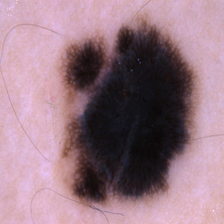

In [6]:
benign = list(dataset_train.glob('benign/*'))
print(benign[0])
PIL.Image.open(str(benign[0]))

/content/skin-cancer-malignant-vs-benign/train/malignant/978.jpg


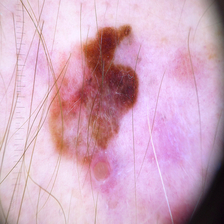

In [7]:
malignant = list(dataset_train.glob('malignant/*'))
print(malignant[0])
PIL.Image.open(str(malignant[0]))

In [36]:
img_height,img_width=32,32
data_dir= r'/content/skin-cancer-malignant-vs-benign/train'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               validation_split=0.2,
                                                               subset="training",
                                                               seed=123,
                                                               label_mode="categorical",
                                                               image_size=(img_height,img_width),
                                                               batch_size=None)

Found 2637 files belonging to 2 classes.
Using 2110 files for training.


In [37]:
import numpy as np
x_train = []
y_train = []
for i,j in train_ds:
  x_train.append(np.array(i))
  y_train.append(np.array(j))

x_train=np.array(x_train).reshape(-1,32,32,3)
y_train=np.array(y_train)

In [38]:
print(x_train.shape)
print(y_train.shape)

(2110, 32, 32, 3)
(2110, 2)


Validation

In [39]:
img_height,img_width=32,32
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               validation_split=0.2,
                                                               subset="validation",
                                                               seed=123,
                                                               label_mode="categorical",
                                                               image_size=(img_height,img_width),
                                                               batch_size=None)

Found 2637 files belonging to 2 classes.
Using 527 files for validation.


In [40]:
import numpy as np
x_val = []
y_val= []
for i,j in val_ds:
  x_val.append(np.array(i))
  y_val.append(np.array(j))

x_val=np.array(x_val).reshape(-1,32,32,3)
y_val=np.array(y_val)

In [41]:
print(x_val.shape)
print(y_val.shape)

(527, 32, 32, 3)
(527, 2)


test

In [43]:
img_height,img_width=32,32
data_dir= r'/content/skin-cancer-malignant-vs-benign/test'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                               seed=123,
                                                               label_mode="categorical",
                                                               image_size=(img_height,img_width),
                                                               batch_size=None)

Found 660 files belonging to 2 classes.


In [55]:
import numpy as np
x_test = []
y_test = []
for i,j in test_ds:
  x_test.append(np.array(i))
  y_test.append(np.array(j))

x_test=np.array(x_test).reshape(-1,32,32,3)
y_test=np.array(y_test)

In [56]:
print(x_test.shape)
print(y_test.shape)

(660, 32, 32, 3)
(660, 2)


In [57]:
from keras.api._v2.keras import activations
model = keras.Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(filters=6,kernel_size=5,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Conv2D(filters=16,kernel_size=5,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Flatten())
model.add(Dense(400,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [58]:
# single o/p to 10 o/p as decoding
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_16 (Dense)            (None, 400)              

In [60]:
results=model.fit(
  x=x_train,
  y=y_train,
  shuffle=True,
  epochs=30,
  validation_data=(x_test,y_test)# to get acc of testing
)

Epoch 1/30
66/66 [==============================] - 3s 8ms/step - loss: 2.0648 - accuracy: 0.6213 - val_loss: 0.5743 - val_accuracy: 0.7273
Epoch 2/30
66/66 [==============================] - 0s 5ms/step - loss: 0.5057 - accuracy: 0.7611 - val_loss: 0.5502 - val_accuracy: 0.7545
Epoch 3/30
66/66 [==============================] - 0s 5ms/step - loss: 0.4096 - accuracy: 0.8133 - val_loss: 0.4169 - val_accuracy: 0.8152
Epoch 4/30
66/66 [==============================] - 0s 5ms/step - loss: 0.3529 - accuracy: 0.8398 - val_loss: 0.4333 - val_accuracy: 0.8136
Epoch 5/30
66/66 [==============================] - 0s 5ms/step - loss: 0.3165 - accuracy: 0.8512 - val_loss: 0.4317 - val_accuracy: 0.8061
Epoch 6/30
66/66 [==============================] - 0s 5ms/step - loss: 0.2523 - accuracy: 0.8919 - val_loss: 0.4469 - val_accuracy: 0.8197
Epoch 7/30
66/66 [==============================] - 0s 5ms/step - loss: 0.2722 - accuracy: 0.8791 - val_loss: 0.4850 - val_accuracy: 0.7939
Epoch 8/30
66/66 [==

In [61]:
eval = model.evaluate(x=x_test, y=y_test)

21/21 [==============================] - 0s 3ms/step - loss: 1.2816 - accuracy: 0.8076


Text(0, 0.5, 'Losses')

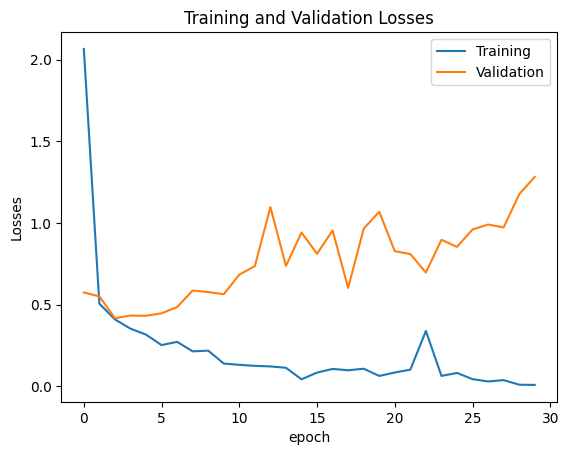

In [62]:
import matplotlib.pyplot as plt

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])

plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')

Text(0, 0.5, 'accuracy')

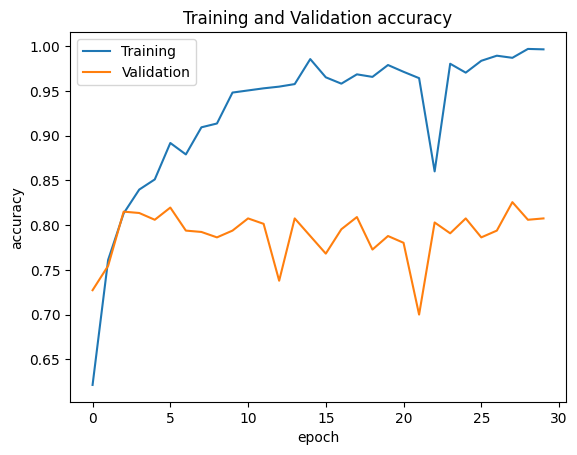

In [63]:
import matplotlib.pyplot as plt

plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])

plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
#plt.ylim([0,1])


ResNet Model

In [64]:
pretrained_model=tf.keras.applications.ResNet50(
  include_top=False, #to do not take the input since from trainning model since it is 732 X 732 and my dataset is 32*32*3
  input_shape=(32,32,3),
  pooling='avg',
  classes= 2,
  weights='imagenet'
)
for i in pretrained_model.layers:
  i.trainable= False


In [65]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


In [67]:
resnet_model=Sequential()
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(2,activation='softmax'))
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= resnet_model.fit(
  x=x_train,
  y=y_train,
  epochs=5,
  validation_data=(x_test,y_test)# to get acc of testing
)

Epoch 1/10


ValueError: ignored